<h2> Activation Function: </h2>
- Sigmoid function
- ReLu function

These are the basic building blocks of learning algorithms, which <b> adapts little by little </b>. It progressively reduces the mistakes made by our network.

<hr/>

<h2> MNIST Dataset: </h2>
They are classified into

<h4> Training set Label: </h4>
    They have label values from 0 to 9.
    
        [offset] [type]          [value]          [description] 
        0000     32 bit integer  0x00000803(2051) magic number 
        0004     32 bit integer  60000            number of images 
        0008     32 bit integer  28               number of rows 
        0012     32 bit integer  28               number of columns 
        0016     unsigned byte   ??               pixel 
        0017     unsigned byte   ??               pixel 
        ........ 
        xxxx     unsigned byte   ??               pixel           





            



<h4> Training set Image file: </h4>

    Pixels organized in row-wise. Pixel values are 0 to 255.
    Here 0-> means background is white
    Here 255-> means foreground is black.
    

        [offset] [type]          [value]          [description] 
        0000     32 bit integer  0x00000803(2051) magic number 
        0004     32 bit integer  60000            number of images 
        0008     32 bit integer  28               number of rows 
        0012     32 bit integer  28               number of columns 
        0016     unsigned byte   ??               pixel 
        0017     unsigned byte   ??               pixel 
        ........ 
        xxxx     unsigned byte   ??               pixel

<hr/>

<h2> Basic Neural Network Terminology </h2>

1. <b>Epoch:</b> No of times the model exposed to the training set. At each iteration  <b>optimizer</b> tries to adjust the weights, so objective function(Loss Function) is minimized.

2. <b>batch_size:</b> No of training instances observed before optimizer performs weight update.

3. <b>Verbose:</b>Simply used to report more information about an operation in you program. 
<hr/>
- <b>1 epoch:</b> 1 Forward pass and Backward pass of all training examples.
- <b>Batch size:</b> No of training example in 1 forward/backward pass. Higher the batch size, the more memory space you'll need.
- <b>No of iterations:</b> No of passes, each pass using[batch size] no of examples. Here <i>one pass=one forward pass + one backward pass</i> 

<b>Example:</b>
If you have 1000 training examples, When your <b>batch size</b> is <b>500</b>,then it will take <b>2 iterations</b> to complete 1 epoch.

Let me explain:

- Total: 1000 Training examples
- Batch Size : 500

<b>1st Iteration:</b>

500 training examples-> In one forward and Backward Pass

<b>2nd Iteration:</b>

Remaining 500 training examples-> In one forward and Backward Pass

Then we finally complete 1 epoch after 2 iteration i.e.; 1 forward and backward pass of all training examples.

<hr/>

<h2>1. Import necessary libraries: </h2>
<hr/>

In [4]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential    # Importing Sequential Model
from keras.layers.core import Dense, Activation  #  Importing  Dense Layers and Activation functions
from keras.optimizers import SGD  # Importing SGD optimizer
from keras.utils import np_utils  
np.random.seed(1671) # for reproducibility -> Once you put the same seed you get same patterns of random numbers.
import matplotlib.pyplot as plt

### 2. Load data

In [5]:
# Data: shuffled and split between train and test sets

(X_train, y_train_label), (X_test, y_test_label) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784

RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test  =  X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### 3. Define the network

In [6]:
# network and training
NB_EPOCH = 20 # 20-> times the model is exposed to the training set.
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer, explained later in this chapter
N_HIDDEN = 128 # Neurons
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

### 4. Normalization
We perform a grayscale normalization to reduce the effect of illumination's differences.

Moreover the neural network converg faster on [0..1] data than on [0..255].

In [7]:
# normalize -> Involve only rescaling to arrive at value relative to some size variables.
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### 5. One Hot encoding of labels.
A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

In [8]:
# convert class vectors to binary class matrices
Y_train_label = np_utils.to_categorical(y_train_label, NB_CLASSES) 
# np_utils.to_categorical Used to convert the array of labelled data to one Hot vector-> Binarization of category
Y_test_label = np_utils.to_categorical(y_test_label, NB_CLASSES)

### 6. Designing Neural Network Architecture:

In [10]:
# 10 outputs
# final stage is softmax
model = Sequential() # Sequential Model.
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
# NB_CLASSES->10 Artificial Neurons==>No of outputs, input_shape(dimension)->784 [INput Variables]
model.add(Activation('softmax')) # It aggregates 10 answers provided by previous layer with 10 neurons
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compiling a model in keras
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [12]:
# Training a model in keras

# Once the model is compiled it can be trained with the fit() function

history = model.fit(X_train, Y_train_label,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 22us/step - loss: 1.3633 - acc: 0.6796 - val_loss: 0.8904 - val_acc: 0.8246
Epoch 2/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.7913 - acc: 0.8272 - val_loss: 0.6572 - val_acc: 0.8546
Epoch 3/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.6436 - acc: 0.8497 - val_loss: 0.5625 - val_acc: 0.8681
Epoch 4/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.5717 - acc: 0.8602 - val_loss: 0.5098 - val_acc: 0.8765
Epoch 5/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.5276 - acc: 0.8678 - val_loss: 0.4758 - val_acc: 0.8826
Epoch 6/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.4973 - acc: 0.8726 - val_loss: 0.4515 - val_acc: 0.8866
Epoch 7/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.4748 - acc: 0.8775 - val_loss: 0.4333 - val_acc

- When Training end we achieve <b>89.79</b>--><b>Accuracy on Training</b>
- <b>90.53</b>--><b>Accuracy on Validataion</b>

In [18]:
# Finally calucating the score.
score = model.evaluate(X_test, Y_test_label, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 23us/step
Test score: 0.34855930196
Test accuracy: 0.9064


We tested our model with <b>Test dataset</b> and achieved accuracy of <b>90.64</b>

In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


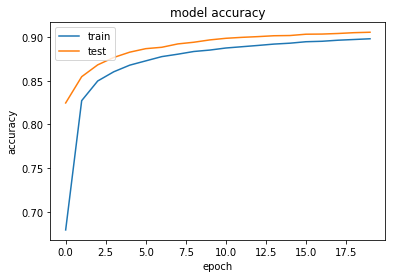

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

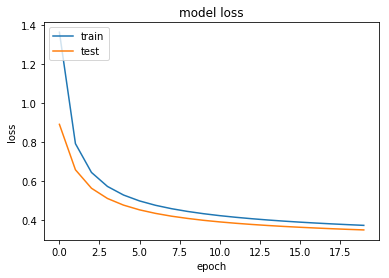

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()